In [49]:
# Used Packages
# Used Packages
import pandas as pd         # For data manipulation
%pip install  -q numpy
%pip install -q tensorflow

# Ensure numpy is installed before importing
import numpy as np          # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns       # For enhanced visualizations
from nltk.corpus import stopwords  # For stopword removal
from nltk.tokenize import word_tokenize  # For tokenization
# from nltk.tokenize import word_tokenize
import nltk                 # For text processing tools
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For evaluation
from gensim.models import Word2Vec  # For word embeddings
from tensorflow.keras.models import Sequential  # For building neural networks
from tensorflow.keras.layers import Dense, Embedding, LSTM  # For model layers
from tensorflow.keras.preprocessing.text import Tokenizer  # For text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For sequence padding

from sklearn.linear_model import LogisticRegression
import re


# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pouyasmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pouyasmac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# Load the dataset
dataset_path = 'data/sentiment140.csv'  # Adjust the path as necessary
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']  # Column names for the dataset
df = pd.read_csv(dataset_path, encoding='latin1', names=columns)

In [13]:
df.head(-5)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS


In [14]:
# Keep only relevant columns
df = df[['sentiment', 'text']]

# Map sentiment values: 0 = negative, 2 = neutral, 4 = positive
df['sentiment'] = df['sentiment'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

# Display the updated dataset
print("\nCleaned Dataset Preview:")
print(df.head())



Cleaned Dataset Preview:
  sentiment                                               text
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  negative  is upset that he can't update his Facebook by ...
2  negative  @Kenichan I dived many times for the ball. Man...
3  negative    my whole body feels itchy and like its on fire 
4  negative  @nationwideclass no, it's not behaving at all....


In [15]:
# Dataset summary
print("\nDataset Summary:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['sentiment'].value_counts())



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  object
 1   text       1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB
None

Missing Values:
sentiment    0
text         0
dtype: int64

Class Distribution:
sentiment
negative    800000
positive    800000
Name: count, dtype: int64


In [16]:

# Define stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [17]:
# Apply cleaning function to the text column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(df[['sentiment', 'text', 'cleaned_text']].head())

Cleaned Dataset Preview:
  sentiment                                               text  \
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  negative  is upset that he can't update his Facebook by ...   
2  negative  @Kenichan I dived many times for the ball. Man...   
3  negative    my whole body feels itchy and like its on fire    
4  negative  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0      thats bummer shoulda got david carr third day  
1  upset cant update facebook texting might cry r...  
2  dived many times ball managed save rest go bounds  
3                   whole body feels itchy like fire  
4                           behaving im mad cant see  


In [20]:
print(df[['sentiment', 'cleaned_text']].head())
print(df['cleaned_text'].apply(type).value_counts())


  sentiment                                       cleaned_text
0  negative      thats bummer shoulda got david carr third day
1  negative  upset cant update facebook texting might cry r...
2  negative  dived many times ball managed save rest go bounds
3  negative                   whole body feels itchy like fire
4  negative                           behaving im mad cant see
cleaned_text
<class 'str'>    1600000
Name: count, dtype: int64


In [22]:
df.head()

,sentiment,text,cleaned_text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,negative,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,negative,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,negative,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,negative,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [ ]:
# Create an empty column named 'tokenized_text'
df['tokenized_text'] = None

# Apply split() to the 'cleaned_text' column and store the results in 'tokenized_text'
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Display the first few rows to confirm the tokenization
print("\nTokenized Dataset Preview:")
print(df[['sentiment', 'cleaned_text', 'tokenized_text']].head())


Tokenized Dataset Preview:
                                      tokenized_text
0  [thats, bummer, shoulda, got, david, carr, thi...
1  [upset, cant, update, facebook, texting, might...
2  [dived, many, times, ball, managed, save, rest...
3            [whole, body, feels, itchy, like, fire]
4                     [behaving, im, mad, cant, see]


In [44]:
# Load GloVe Embeddings
import os

# Define the path to GloVe embeddings
glove_path = 'data/glove.6B.100d.txt'  # Adjust path as needed

# Create a dictionary to store GloVe embeddings
glove_embeddings = {}

# Read the GloVe file
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]  # The word
        vector = np.array(values[1:], dtype='float32')  # The embedding vector
        glove_embeddings[word] = vector

print("Loaded GloVe embeddings.")


Loaded GloVe embeddings.


In [45]:
# Function to compute the average embedding for a tweet
def get_tweet_embedding(tokens, embeddings, dim=100):
    valid_vectors = [embeddings[word] for word in tokens if word in embeddings]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)  # Average the embeddings
    else:
        return np.zeros(dim)  # Return a zero vector if no valid words are found


In [46]:
# Compute embeddings for all tweets
df['embedding'] = df['tokenized_text'].apply(lambda tokens: get_tweet_embedding(tokens, glove_embeddings))

# Convert embeddings into a NumPy array
X = np.array(df['embedding'].tolist())  # Features
y = df['sentiment']  # Labels

In [47]:
print("Feature matrix shape:", X.shape)


Feature matrix shape: (1600000, 100)


In [48]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1280000, 100)
Testing data shape: (320000, 100)


In [58]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

print("Logistic Regression model training completed!")

Logistic Regression model training completed!


In [59]:
# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6969625

Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.69      0.70    159494
    positive       0.70      0.70      0.70    160506

    accuracy                           0.70    320000
   macro avg       0.70      0.70      0.70    320000
weighted avg       0.70      0.70      0.70    320000



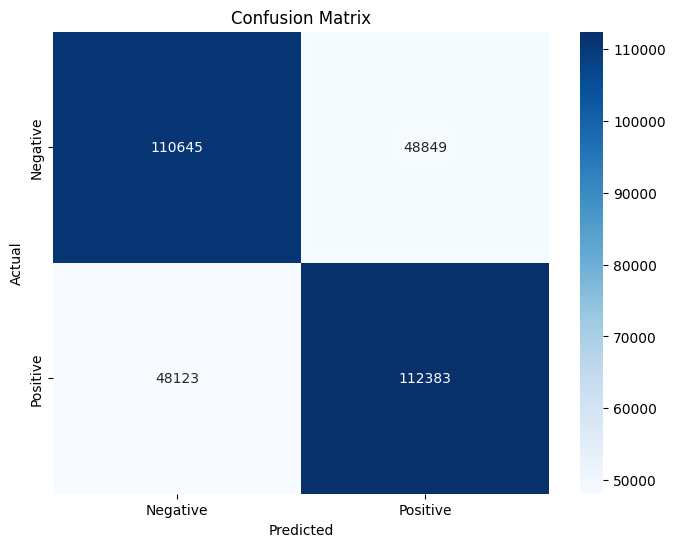

In [61]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression Report
Model Performance:

Accuracy: The Logistic Regression model achieved an accuracy of 69.70% on the test dataset.
Precision, Recall, and F1-Score:
Both the negative and positive classes have comparable precision, recall, and F1-scores, all approximately 0.70, indicating balanced performance.
The weighted average metrics are consistent, reflecting the balanced dataset.
Confusion Matrix Analysis:
True Negatives (Negative classified as Negative): 110,645
False Positives (Negative classified as Positive): 48,849
False Negatives (Positive classified as Negative): 48,123
True Positives (Positive classified as Positive): 112,383
Conclusion: The model demonstrates baseline performance with a 69.7% accuracy, but there is significant room for improvement. Both classes have comparable performance, but false positives and false negatives highlight areas for optimization.